## Design of Run-of-River Power Plant

(a) Read the provided dataset as a pandas.Series with parsed dates

In [1]:
import pandas as pd

# Read the CSV file
data = pd.read_csv('water-flows.csv', parse_dates=['Date'], index_col='Date')

# Convert the flow rates to a pandas Series
flow_rates = data['Scaled Flow'].rename('Flow Rate (m3/s)')

(b) Plot the monthly resampled mean flow rate across the whole time span. Use a figure size of 20 by 4 inches and apply appropriate labels.

C:\Users\Shahzaib Khan\AppData\Local\Temp\ipykernel_15308\1380690973.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_mean = flow_rates.resample('M').mean()


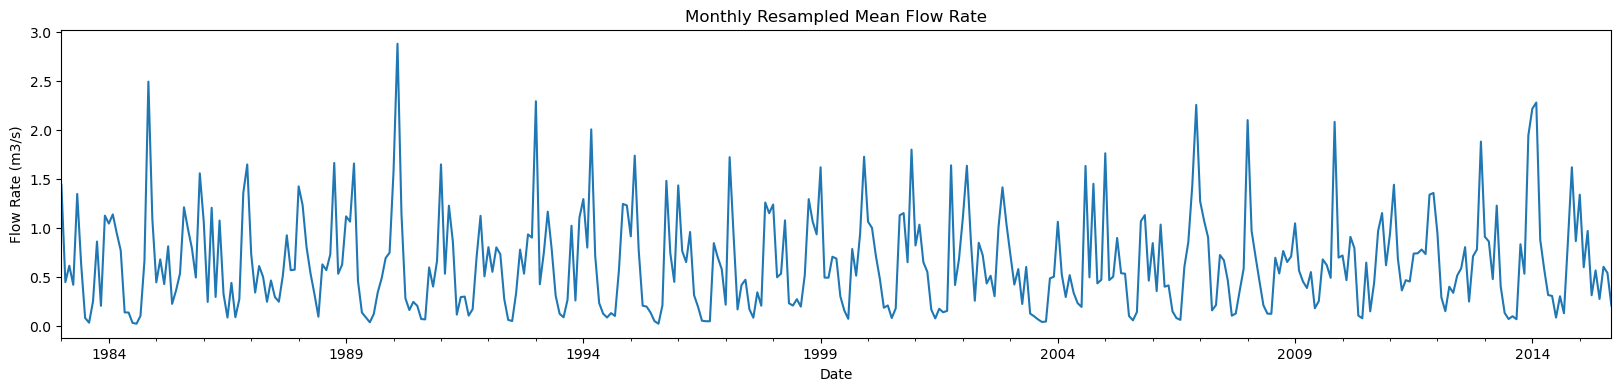

In [2]:
import matplotlib.pyplot as plt

# Resample the flow rates to monthly mean
monthly_mean = flow_rates.resample('M').mean()

# Create the plot
fig, ax = plt.subplots(figsize=(20, 4))
monthly_mean.plot(ax=ax)

# Set labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Flow Rate (m3/s)')
ax.set_title('Monthly Resampled Mean Flow Rate')

# Display the plot
plt.show()

(c) What is the value for the compensation flow?

In [3]:
compensation_flow = flow_rates.quantile(0.05)
compensation_flow

0.054569

(d) What is the value for the design flow?

In [4]:
design_flow = flow_rates.quantile(0.3)
design_flow

0.2082116666666666

(e) Calculate a time series for the available flow for power production (i.e. deducted reserve flow and capped at design flow, no negative flows).

In [5]:
available_flow = flow_rates.clip(lower=compensation_flow).clip(upper=design_flow)
available_flow

Date
1983-01-01    0.208212
1983-01-02    0.208212
1983-01-03    0.208212
1983-01-04    0.208212
1983-01-05    0.208212
                ...   
2015-09-26    0.178665
2015-09-27    0.163430
2015-09-28    0.151888
2015-09-29    0.142009
2015-09-30    0.133422
Name: Flow Rate (m3/s), Length: 11961, dtype: float64

(f) In one figure, plot a duration curve for the total flow and the available flow. Label the lines. The x-axis should indicate the percentage of time across the whole 30-year time span. Limit the y-axis to 2 m3/s.

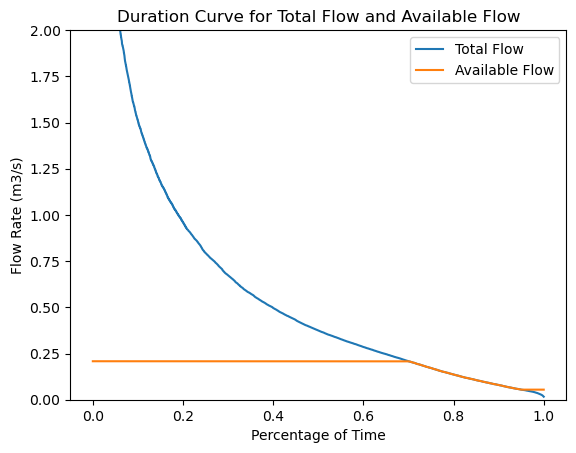

In [6]:
import numpy as np

# Sort the flow rates in descending order
sorted_flows = flow_rates.sort_values(ascending=False)

# Calculate the cumulative probabilities
total_prob = np.arange(1, len(sorted_flows) + 1) / len(sorted_flows)
available_prob = np.arange(1, len(available_flow) + 1) / len(available_flow)

# Create the plot
fig, ax = plt.subplots()
ax.plot(total_prob, sorted_flows, label='Total Flow')
ax.plot(available_prob, available_flow.sort_values(ascending=False), label='Available Flow')

# Set labels and title
ax.set_xlabel('Percentage of Time')
ax.set_ylabel('Flow Rate (m3/s)')
ax.set_title('Duration Curve for Total Flow and Available Flow')
ax.legend()

# Set y-axis limit
ax.set_ylim(0, 2)

# Display the plot
plt.show()


(g) Determine the rated power of the run-of-river scheme using the design flow

In [7]:
head = 60  # Net head in meters
efficiency = 0.85  # Generator efficiency

rated_power = design_flow * head * efficiency
rated_power

10.618794999999997

(h) Compute a time series for the daily electricity production in kWh of the scheme based on the available flows. Consider that daily time series for the flows are given.

In [8]:
time_series_power = available_flow * head * efficiency * 24 * 3600 / 1000  # Convert to kWh
time_series_power

Date
1983-01-01    917.463888
1983-01-02    917.463888
1983-01-03    917.463888
1983-01-04    917.463888
1983-01-05    917.463888
                 ...    
2015-09-26    787.269456
2015-09-27    720.137952
2015-09-28    669.280752
2015-09-29    625.746989
2015-09-30    587.909232
Name: Flow Rate (m3/s), Length: 11961, dtype: float64

(i) What is the long-term average capacity factor of the run-of-river power plant?

In [9]:
average_capacity_factor = (time_series_power.sum() / (rated_power * len(time_series_power))) * 100
average_capacity_factor

7454.719154324726

(j) Compute and plot the annual energy yields of the plant for the years 1983 to 2014

C:\Users\Shahzaib Khan\AppData\Local\Temp\ipykernel_15308\375145820.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  annual_energy_yield = time_series_power.resample('M').sum()


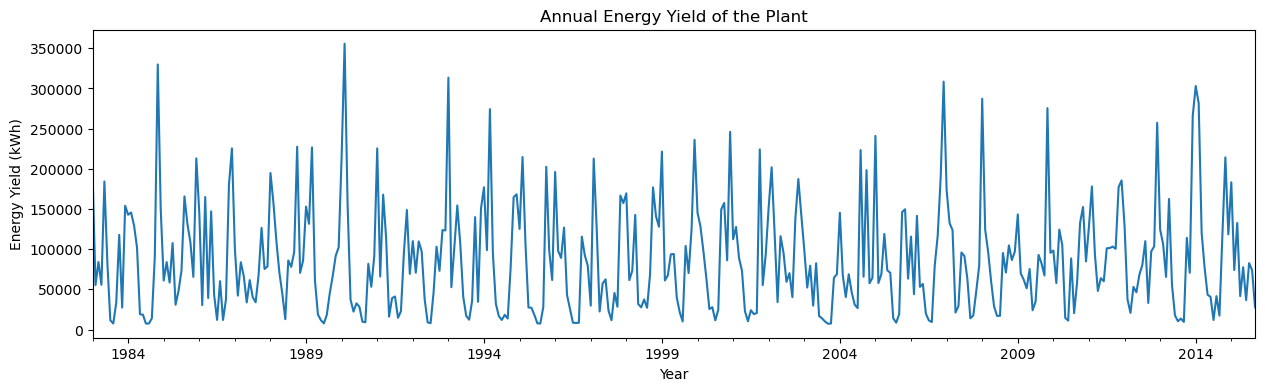

In [19]:
annual_energy_yield = time_series_power.resample('M').sum()

# Create the plot
fig, ax = plt.subplots(figsize=(15,4))
annual_energy_yield.plot(ax=ax)

# Set labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Energy Yield (kWh)')
ax.set_title('Annual Energy Yield of the Plant')

# Display the plot
plt.show()


(k) Compute and plot the relative deviation of the annual energy yields from the long-term average annual energy yield. (I.e. negative values in % if energy yield is below long-term average.)

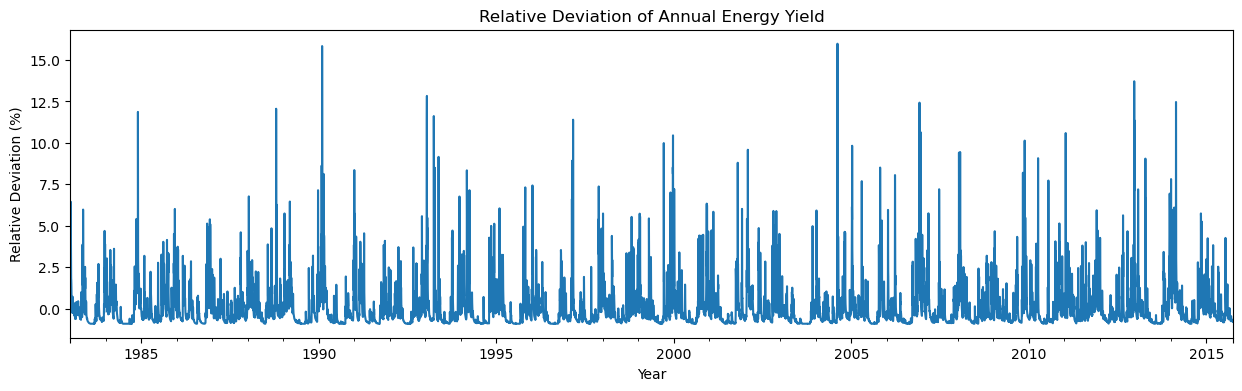

In [24]:
relative_deviation = ((time_series_power - time_series_power.mean()) / time_series_power.mean())

# Create the plot
fig, ax = plt.subplots(figsize=(15,4))
relative_deviation.plot(ax=ax)

# Set labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Relative Deviation (%)')
ax.set_title('Relative Deviation of Annual Energy Yield')

# Display the plot
plt.show()


(l) Plot the relationship between power rating and average annual energy yield based on design flows ranging between the 0% and 100% quantiles of flow in increments of 5%. Based on this plot, explain why it might make sense to limit the design flow.

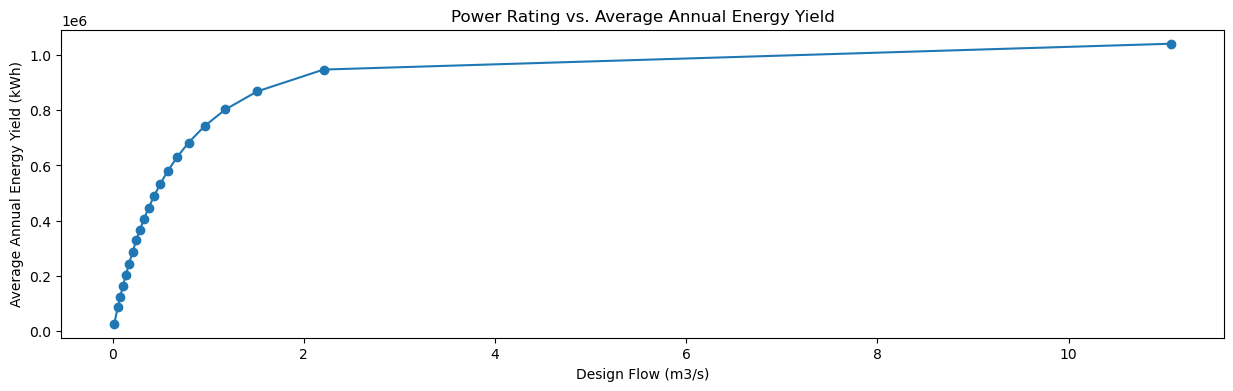

In [23]:
design_flows = flow_rates.quantile(np.arange(0, 1.05, 0.05))
average_annual_energy_yield = []

for design_flow in design_flows:
    available_flow = flow_rates.clip(lower=compensation_flow).clip(upper=design_flow)
    time_series_power = available_flow * head * efficiency * 24 * 3600 / 1000
    annual_energy_yield = time_series_power.resample('YE').sum().mean()
    average_annual_energy_yield.append(annual_energy_yield)

# Create the plot
fig, ax = plt.subplots(figsize=(15,4))
ax.plot(design_flows, average_annual_energy_yield, marker='o')

# Set labels and title
ax.set_xlabel('Design Flow (m3/s)')
ax.set_ylabel('Average Annual Energy Yield (kWh)')
ax.set_title('Power Rating vs. Average Annual Energy Yield')

# Display the plot
plt.show()
